# Keras
## Sequential API

In [1]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [2]:
X_train, X_val, y_train, y_val = X_train[:55000], X_train[55000:], y_train[:55000], y_train[55000:]

X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0

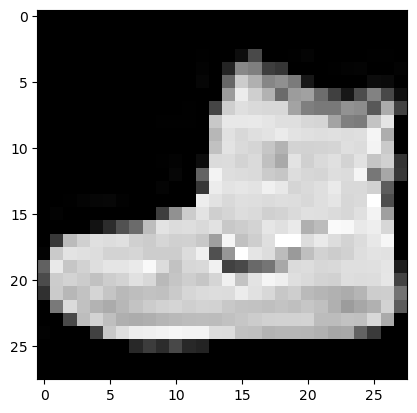

In [3]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='gray')
plt.show()

In [4]:
tf.random.set_seed(20)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5056 - accuracy: 0.8217 - val_loss: 0.3936 - val_accuracy: 0.8502
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3700 - accuracy: 0.8650 - val_loss: 0.3668 - val_accuracy: 0.8622
Epoch 3/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3376 - accuracy: 0.8763 - val_loss: 0.3630 - val_accuracy: 0.8692
Epoch 4/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3123 - accuracy: 0.8859 - val_loss: 0.3485 - val_accuracy: 0.8718
Epoch 5/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2960 - accuracy: 0.8910 - val_loss: 0.3422 - val_accuracy: 0.8776
Epoch 6/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2829 - accuracy: 0.8952 - val_loss: 0.3533 - val_accuracy: 0.8712
Epoch 7/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2685 - accuracy: 0.8999 - val_loss: 0.3282 - val_accuracy:

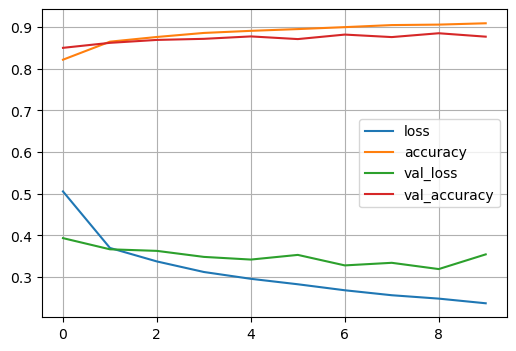

In [8]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(6, 4))
plt.grid(True)
plt.show()

In [9]:
results = model.evaluate(X_test, y_test)
print(r'Loss: {:.2f}, Accuracy: {:.2f}'.format(results[0], results[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.3620 - accuracy: 0.8730
Loss: 0.36, Accuracy: 0.87


In [10]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

print(y_pred[0])

9


## Sequential API for Regression

In [1]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

cali_housing = fetch_california_housing()

X, y = cali_housing.data, cali_housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=20)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train.shape, X_val.shape, X_test.shape

((13209, 8), (3303, 8), (4128, 8))

In [2]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=X_train.shape[1:]))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [3]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [4]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
413/413 [==============================] - 2s 2ms/step - loss: 0.7723 - mae: 0.6106 - val_loss: 0.3955 - val_mae: 0.4502
Epoch 2/10
413/413 [==============================] - 1s 2ms/step - loss: 0.4049 - mae: 0.4488 - val_loss: 0.3677 - val_mae: 0.4507
Epoch 3/10
413/413 [==============================] - 1s 2ms/step - loss: 0.3662 - mae: 0.4294 - val_loss: 0.3322 - val_mae: 0.4143
Epoch 4/10
413/413 [==============================] - 1s 2ms/step - loss: 0.3523 - mae: 0.4215 - val_loss: 0.3253 - val_mae: 0.3993
Epoch 5/10
413/413 [==============================] - 1s 2ms/step - loss: 0.3396 - mae: 0.4116 - val_loss: 0.3344 - val_mae: 0.4214
Epoch 6/10
413/413 [==============================] - 1s 2ms/step - loss: 0.3324 - mae: 0.4055 - val_loss: 0.3051 - val_mae: 0.3845
Epoch 7/10
413/413 [==============================] - 1s 1ms/step - loss: 0.3255 - mae: 0.3981 - val_loss: 0.2961 - val_mae: 0.3812
Epoch 8/10
413/413 [==============================] - 1s 1ms/step - loss: 0.

In [5]:
mse, mae = model.evaluate(X_test, y_test)
print(r'Test MSE: {:.2f}, Test MAE: {:.2f}'.format(mse, mae))

129/129 [==============================] - 0s 832us/step - loss: 0.3164 - mae: 0.3788
Test MSE: 0.32, Test MAE: 0.38


In [6]:
y_pred = model.predict(X_test)
print(y_pred[:5].ravel())
print(y_test[:5])

[1.5386095 2.5097454 1.4396385 2.0456438 2.2348397]
[1.176 2.922 1.313 2.659 2.102]
